In [7]:
import numpy as np

# File paths
file_case1 = "results/cov_matrix_case1_FMA.csv"
file_case2 = "results/cov_matrix_case2_FMA.csv"
file_case3 = "results/cov_matrix_case3.csv"

# Load the CSV files into NumPy arrays
cov_matrix_case1 = np.loadtxt(file_case1, delimiter=",")
cov_matrix_case2 = np.loadtxt(file_case2, delimiter=",")
cov_matrix_case3 = np.loadtxt(file_case2, delimiter=",")

In [8]:
difference = cov_matrix_case1 - cov_matrix_case2
max_diff = np.max(np.abs(difference))
mean_diff = np.mean(difference)
frobenius_norm = np.linalg.norm(difference, ord="fro")
print(f"Max Absolute Difference: {max_diff}")
print(f"Mean Difference: {mean_diff}")
print(f"Frobenius Norm of Difference: {frobenius_norm}")

Max Absolute Difference: 0.16392600000000002
Mean Difference: 0.0109544
Frobenius Norm of Difference: 0.18983743697174174


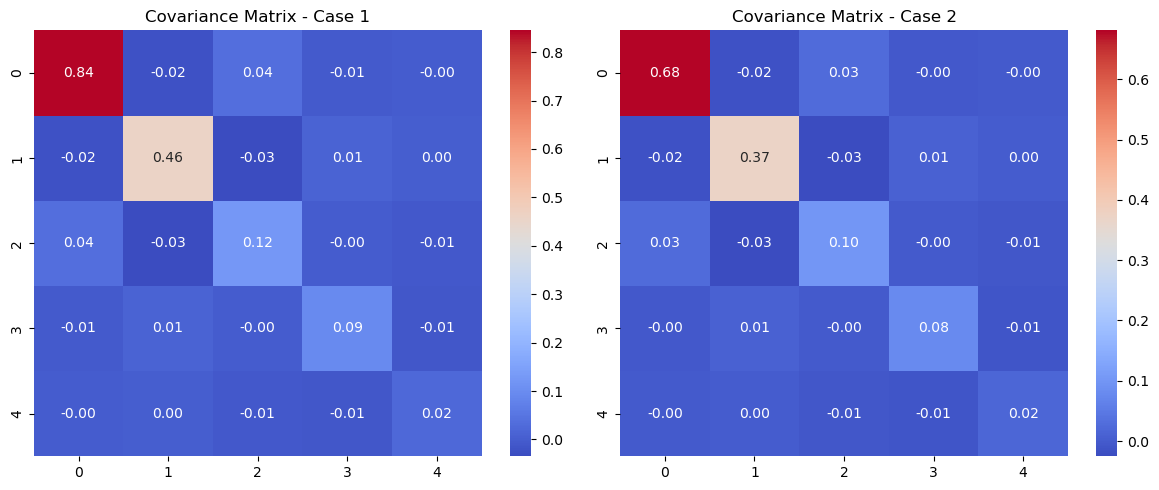

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot heatmap for cov_matrix_case1
sns.heatmap(cov_matrix_case1, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Covariance Matrix - Case 1")

# Plot heatmap for cov_matrix_case2
sns.heatmap(cov_matrix_case2, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Covariance Matrix - Case 2")

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
# Combine matrices into a single array for easier operations
matrices = [cov_matrix_case1, cov_matrix_case2, cov_matrix_case3]

# Compute pairwise differences
pairwise_differences = [
    (f"Case{i+1} vs Case{j+1}", matrices[i] - matrices[j])
    for i in range(len(matrices))
    for j in range(i+1, len(matrices))
]

# Compute metrics
for name, difference in pairwise_differences:
    max_diff = np.max(np.abs(difference))
    mean_diff = np.mean(difference)
    frobenius_norm = np.linalg.norm(difference, ord="fro")
    print(f"\n{name}:")
    print(f"Max Absolute Difference: {max_diff}")
    print(f"Mean Difference: {mean_diff}")
    print(f"Frobenius Norm of Difference: {frobenius_norm}")

# Aggregate differences across all three matrices
mean_matrix = np.mean(matrices, axis=0)  # Element-wise average of the three matrices
aggregate_diff = np.array([m - mean_matrix for m in matrices])

# Compute overall metrics
aggregate_max_diff = np.max(np.abs(aggregate_diff))
aggregate_mean_diff = np.mean(aggregate_diff)
aggregate_frobenius_norm = np.sqrt(np.sum([np.linalg.norm(diff, ord="fro") ** 2 for diff in aggregate_diff]))

print("\nAggregate Metrics (Deviation from Mean Matrix):")
print(f"Max Absolute Difference: {aggregate_max_diff}")
print(f"Mean Difference: {aggregate_mean_diff}")
print(f"Frobenius Norm of Aggregate Difference: {aggregate_frobenius_norm}")


Case1 vs Case2:
Max Absolute Difference: 0.0048850000000000005
Mean Difference: 0.0004782031249999999
Frobenius Norm of Difference: 0.009855937550532672

Case1 vs Case3:
Max Absolute Difference: 0.0048850000000000005
Mean Difference: 0.0004782031249999999
Frobenius Norm of Difference: 0.009855937550532672

Case2 vs Case3:
Max Absolute Difference: 0.0
Mean Difference: 0.0
Frobenius Norm of Difference: 0.0

Aggregate Metrics (Deviation from Mean Matrix):
Max Absolute Difference: 0.0032566666666666647
Mean Difference: 3.614007241618348e-20
Frobenius Norm of Aggregate Difference: 0.008047339311847113
